***Your eBird API key:  lek901p0teia***

***NOVAA Token:	yFVOCRUctNQqjeaAKJTnbFyKtzReRfcu***

In [1]:
import time
import requests
import pandas as pd

# List of US state codes
regions = ["US-CA", "US-TX", "US-FL", "US-NY", "US-IL", "US-WA", "US-CO", "US-OH", "US-MN", "US-NC"]

# API Key
EBIRD_API_KEY = EBIRD_API_KEY = "lek901p0teia"

# Base API URL
EBIRD_API_URL = "https://api.ebird.org/v2/data/obs/{}/recent"

# Collect data for all regions
all_data = []

for region in regions:
    print(f"Fetching data for {region}...")
    url = EBIRD_API_URL.format(region)
    headers = {"X-eBirdApiToken": EBIRD_API_KEY}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data)
        df["region"] = region  # Add region column
        df.to_csv(f"ebird_observations_{region}.csv", index=False)  # Save individual region data
        all_data.append(df)
    else:
        print(f"Failed to fetch data for {region}. Status code: {response.status_code}")

    time.sleep(2)  # Avoid API rate limits

# Combine all data
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.to_csv("ebird_observations_all_regions.csv", index=False)
    print("All regions' data saved to 'ebird_observations_all_regions.csv'.")


Fetching data for US-CA...
Fetching data for US-TX...
Fetching data for US-FL...
Fetching data for US-NY...
Fetching data for US-IL...
Fetching data for US-WA...
Fetching data for US-CO...
Fetching data for US-OH...
Fetching data for US-MN...
Fetching data for US-NC...
All regions' data saved to 'ebird_observations_all_regions.csv'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("ebird_observations_all_regions.csv")

# Display dataset information
print("Dataset Overview:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows of dataset:")
print(df.head())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Count unique bird species
unique_species = df["comName"].nunique()
print(f"\nTotal unique bird species observed: {unique_species}")

# Most frequently observed bird species
top_species = df["comName"].value_counts().head(10)
print("\nTop 10 Most Observed Bird Species:")
print(top_species)

# Count observations per region
region_counts = df["region"].value_counts()

# Convert observation date to datetime
df["obsDt"] = pd.to_datetime(df["obsDt"], errors='coerce')

# Extract year and month for time series analysis
df["year"] = df["obsDt"].dt.year
df["month"] = df["obsDt"].dt.month

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   speciesCode      3209 non-null   object 
 1   comName          3209 non-null   object 
 2   sciName          3209 non-null   object 
 3   locId            3209 non-null   object 
 4   locName          3209 non-null   object 
 5   obsDt            3209 non-null   object 
 6   howMany          3154 non-null   float64
 7   lat              3209 non-null   float64
 8   lng              3209 non-null   float64
 9   obsValid         3209 non-null   bool   
 10  obsReviewed      3209 non-null   bool   
 11  locationPrivate  3209 non-null   bool   
 12  subId            3209 non-null   object 
 13  exoticCategory   214 non-null    object 
 14  region           3209 non-null   object 
dtypes: bool(3), float64(3), object(9)
memory usage: 310.4+ KB
None

First 5 rows of dataset:

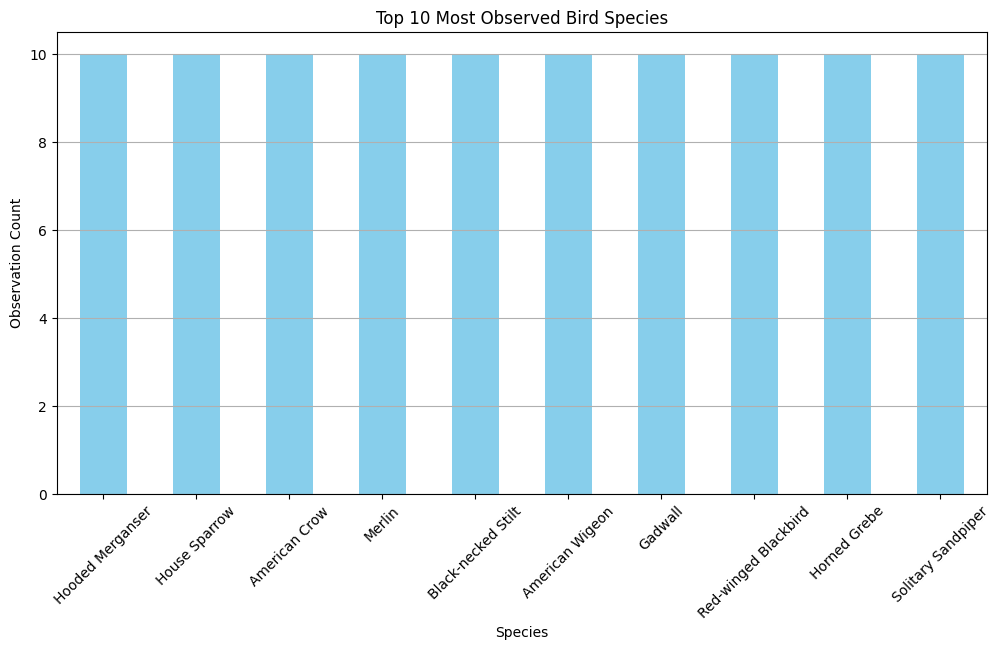

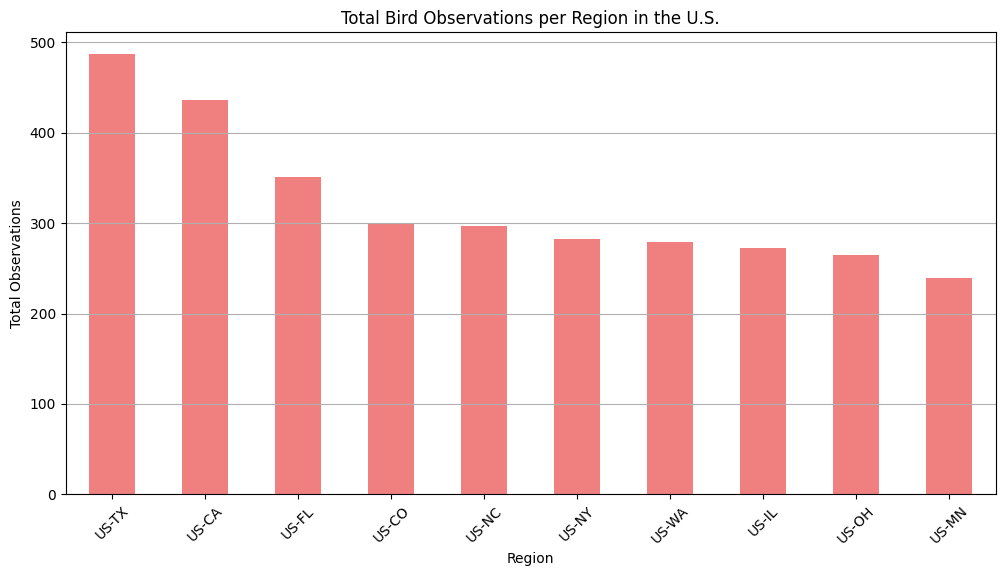

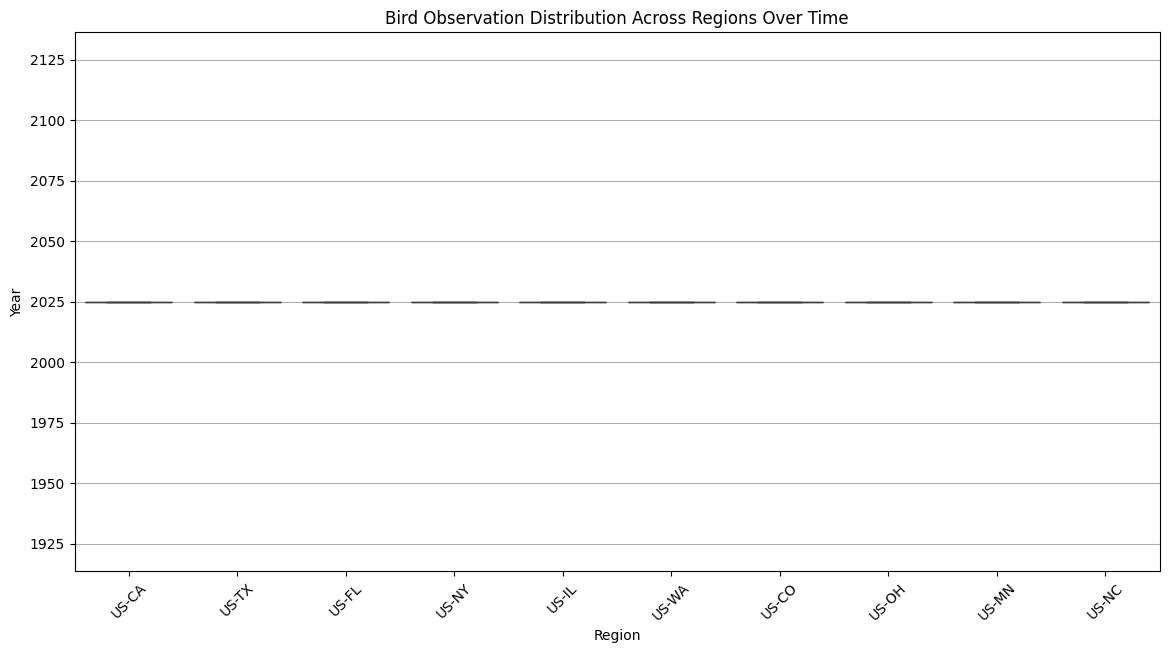

In [3]:

# ---- Visualization ----

# Plot 1: Top 10 Bird Species Observed
plt.figure(figsize=(12, 6))
top_species.plot(kind="bar", color="skyblue")
plt.xlabel("Species")
plt.ylabel("Observation Count")
plt.title("Top 10 Most Observed Bird Species")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Plot 2: Total Observations per Region
plt.figure(figsize=(12, 6))
region_counts.plot(kind="bar", color="lightcoral")
plt.xlabel("Region")
plt.ylabel("Total Observations")
plt.title("Total Bird Observations per Region in the U.S.")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Plot 3: Monthly Bird Observations
plt.figure(figsize=(12, 6))
df.groupby("month")["comName"].count().plot(kind="bar", color="purple")
plt.xlabel("Month")
plt.ylabel("Total Observations")
plt.title("Monthly Bird Observations Trend")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

# Plot 4: Species Distribution in Different Regions
plt.figure(figsize=(14, 7))
sns.boxplot(x="region", y="year", data=df)
plt.xlabel("Region")
plt.ylabel("Year")
plt.title("Bird Observation Distribution Across Regions Over Time")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


In [4]:

import requests
import pandas as pd
import time

# NOAA API token
NOAA_API_TOKEN = "yFVOCRUctNQqjeaAKJTnbFyKtzReRfcu"

# NOAA API URL
NOAA_API_URL = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"

# Define parameters
dataset_id = "GHCND"  # Global Historical Climatology Network Daily
data_types = ["TMAX", "TMIN", "PRCP"]  # Max temp, Min temp, Precipitation
start_date = "2023-01-01"
end_date = "2023-12-31"

# Mapping regions to valid NOAA weather stations
regions = {
    "US-CA": "GHCND:USW00023174",  # Los Angeles, CA
    "US-TX": "GHCND:USW00013958",  # Houston, TX
    "US-FL": "GHCND:USW00012842",  # Miami, FL
    "US-NY": "GHCND:USW00014732",  # New York City, NY
    "US-IL": "GHCND:USW00014819",  # Chicago, IL
    "US-WA": "GHCND:USW00024233",  # Seattle, WA
    "US-CO": "GHCND:USW00023062",  # Denver, CO
    "US-OH": "GHCND:USW00014853",  # Columbus, OH
    "US-MN": "GHCND:USW00014922",  # Minneapolis, MN
    "US-NC": "GHCND:USW00013722",  # Charlotte, NC
}

# Request headers
headers = {"token": NOAA_API_TOKEN}

# Store data from all regions
all_data = []

for region, station in regions.items():
    print(f"Fetching climate data for {region} ({station})...")

    params = {
        "datasetid": dataset_id,
        "stationid": station,
        "startdate": start_date,
        "enddate": end_date,
        "datatypeid": data_types,
        "limit": 1000,
        "units": "metric"
    }

    response = requests.get(NOAA_API_URL, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json().get("results", [])
        if data:
            df = pd.DataFrame(data)
            df["region"] = region  # Add region column
            df.to_csv(f"noaa_climate_data_{region}.csv", index=False)
            all_data.append(df)
        else:
            print(f"Warning: No data found for {region}.")
    else:
        print(f"Failed to fetch data for {region}. Status code: {response.status_code}")

    time.sleep(2)  # Prevent hitting API rate limits

# Combine all data
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.to_csv("noaa_climate_data_all_regions.csv", index=False)
    print("NOAA climate data successfully saved to 'noaa_climate_data_all_regions.csv'.")
else:
    print("No valid data retrieved from NOAA API.")

Fetching climate data for US-CA (GHCND:USW00023174)...
Fetching climate data for US-TX (GHCND:USW00013958)...
Fetching climate data for US-FL (GHCND:USW00012842)...
Fetching climate data for US-NY (GHCND:USW00014732)...
Fetching climate data for US-IL (GHCND:USW00014819)...
Fetching climate data for US-WA (GHCND:USW00024233)...
Fetching climate data for US-CO (GHCND:USW00023062)...
Fetching climate data for US-OH (GHCND:USW00014853)...
Fetching climate data for US-MN (GHCND:USW00014922)...
Fetching climate data for US-NC (GHCND:USW00013722)...
NOAA climate data successfully saved to 'noaa_climate_data_all_regions.csv'.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("noaa_climate_data_all_regions.csv")

# Display dataset overview
print("Dataset Overview:")
print(df.info())

# Show the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Extract year and month for analysis
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# Replace missing values with NaN
df = df.fillna(method="ffill")

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        10000 non-null  object 
 1   datatype    10000 non-null  object 
 2   station     10000 non-null  object 
 3   attributes  10000 non-null  object 
 4   value       10000 non-null  float64
 5   region      10000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 468.9+ KB
None

First 5 rows of the dataset:
                  date datatype            station attributes  value region
0  2023-01-01T00:00:00     PRCP  GHCND:USW00023174   ,,W,2400    2.5  US-CA
1  2023-01-01T00:00:00     TMAX  GHCND:USW00023174   ,,W,2400   16.1  US-CA
2  2023-01-01T00:00:00     TMIN  GHCND:USW00023174   ,,W,2400   12.2  US-CA
3  2023-01-02T00:00:00     PRCP  GHCND:USW00023174   ,,W,2400    0.8  US-CA
4  2023-01-02T00:00:00     TMAX  GHCND:USW00023174   ,,W,2400   14.4  US-CA

M

<ipython-input-5-4d6574e12eb8>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


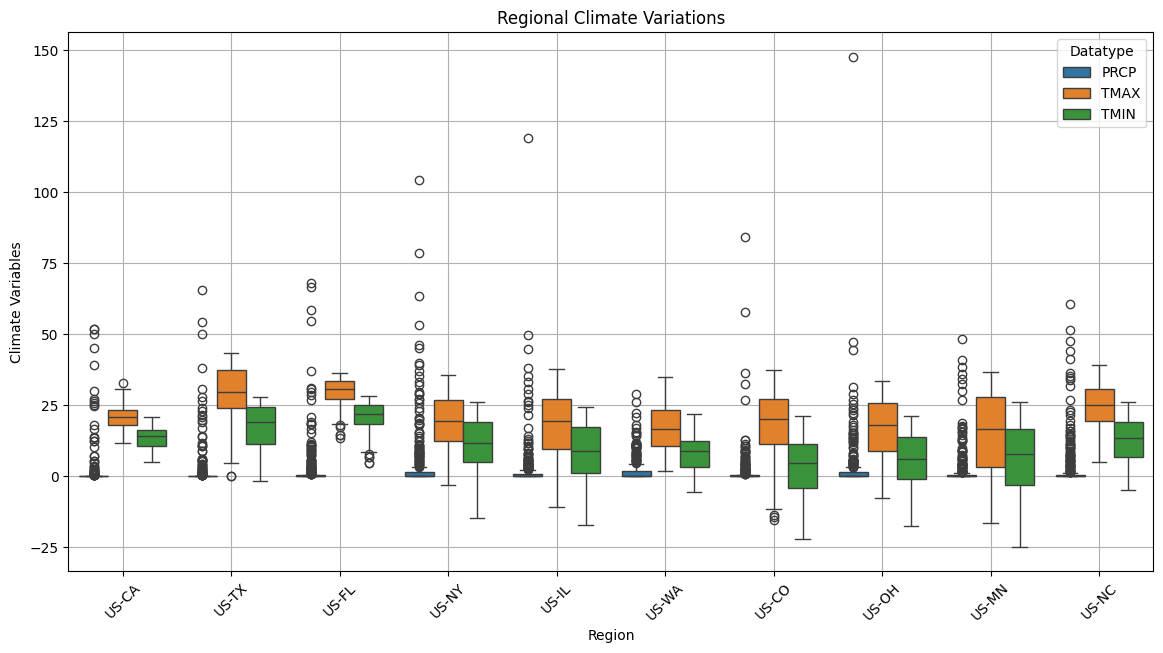

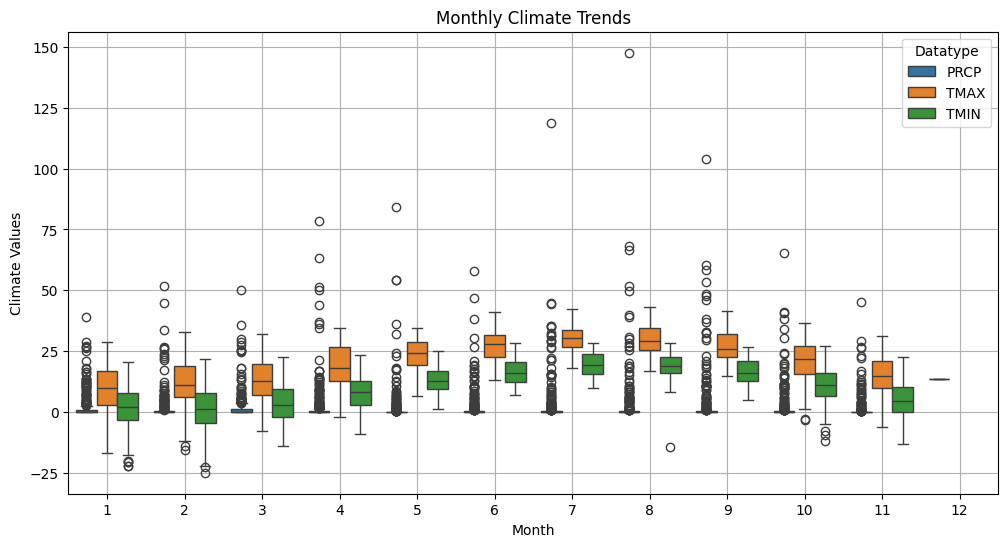

In [6]:

# ---- Visualization ----

# Plot 1: Regional Climate Variations (Box Plot)
plt.figure(figsize=(14, 7))
sns.boxplot(x="region", y="value", hue="datatype", data=df[df["datatype"].isin(["TMAX", "TMIN", "PRCP"])])
plt.xlabel("Region")
plt.ylabel("Climate Variables")
plt.title("Regional Climate Variations")
plt.xticks(rotation=45)
plt.legend(title="Datatype")
plt.grid()
plt.show()

# Plot 2: Monthly Climate Trends
plt.figure(figsize=(12, 6))
sns.boxplot(x="month", y="value", hue="datatype", data=df[df["datatype"].isin(["TMAX", "TMIN", "PRCP"])])
plt.xlabel("Month")
plt.ylabel("Climate Values")
plt.title("Monthly Climate Trends")
plt.legend(title="Datatype")
plt.grid()
plt.show()


**Dataset Integration**

In [8]:

# Load the datasets
bird_data_path = "ebird_observations.csv"
climate_data_path = "noaa_climate_data.csv"

bird_df = pd.read_csv(bird_data_path)
climate_df = pd.read_csv(climate_data_path)

# Convert date columns to datetime format, handling mixed formats
bird_df['obsDt'] = pd.to_datetime(bird_df['obsDt'], errors='coerce', infer_datetime_format=True)
climate_df['date'] = pd.to_datetime(climate_df['date'], errors='coerce', infer_datetime_format=True)

# Extract year and month for analysis
bird_df['year'] = bird_df['obsDt'].dt.year
bird_df['month'] = bird_df['obsDt'].dt.month
climate_df['year'] = climate_df['date'].dt.year
climate_df['month'] = climate_df['date'].dt.month

# Drop rows where year or month could not be extracted
bird_df = bird_df.dropna(subset=['year', 'month'])
climate_df = climate_df.dropna(subset=['year', 'month'])

# Convert to integer
bird_df['year'] = bird_df['year'].astype(int)
bird_df['month'] = bird_df['month'].astype(int)
climate_df['year'] = climate_df['year'].astype(int)
climate_df['month'] = climate_df['month'].astype(int)

# Pivot climate data so each datatype (TMAX, TMIN, PRCP) becomes its own column
climate_pivot = climate_df.pivot_table(index=['region', 'year', 'month'], columns='datatype', values='value').reset_index()

# Rename columns for clarity
climate_pivot.columns = ['region', 'year', 'month'] + [col for col in climate_pivot.columns if col not in ['region', 'year', 'month']]

# Merge bird observations with climate data
merged_df = pd.merge(
    bird_df,
    climate_pivot,
    on=['region', 'year', 'month'],
    how='left'
)

# Remove duplicates
merged_df = merged_df.drop_duplicates()

# Handle missing values by filling with the mean of each column where applicable
merged_df.fillna(merged_df.mean(numeric_only=True), inplace=True)

# Save processed data
processed_data_path = "processed_bird_climate_data.csv"
merged_df.to_csv(processed_data_path, index=False)


<ipython-input-8-a982540b3a6f>:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bird_df['obsDt'] = pd.to_datetime(bird_df['obsDt'], errors='coerce', infer_datetime_format=True)
<ipython-input-8-a982540b3a6f>:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  climate_df['date'] = pd.to_datetime(climate_df['date'], errors='coerce', infer_datetime_format=True)


**Temporal Analysis (Migration Timing Trends)**

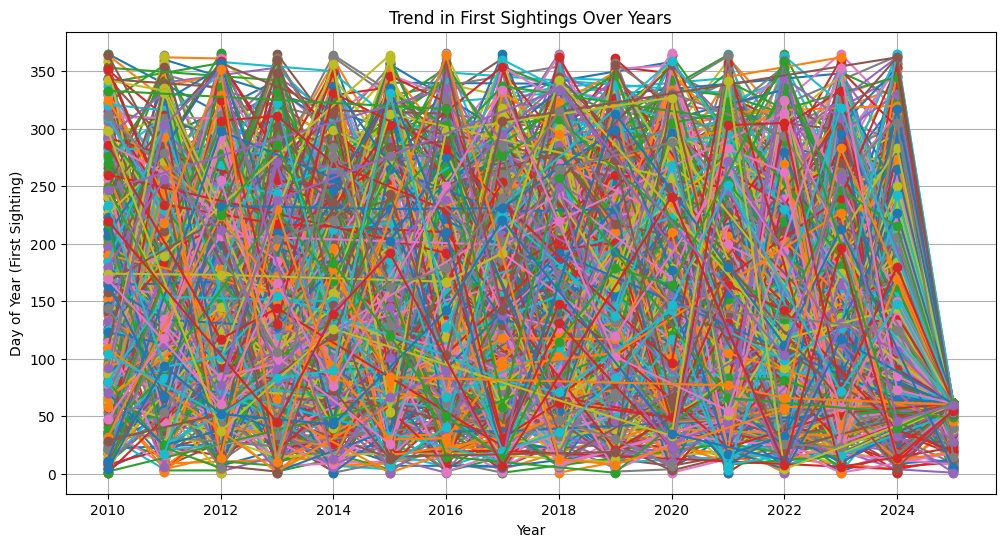

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Get first sightings per species per year
first_sightings = bird_df.groupby(['comName', 'year'])['obsDt'].min().reset_index()

# Visualization 1: Line plot for trend in first sightings over years
plt.figure(figsize=(12, 6))
for species in first_sightings['comName'].unique():
    species_data = first_sightings[first_sightings['comName'] == species]
    plt.plot(species_data['year'], species_data['obsDt'].dt.dayofyear, marker='o', label=species)

plt.xlabel("Year")
plt.ylabel("Day of Year (First Sighting)")
plt.title("Trend in First Sightings Over Years")
plt.grid()
plt.show()

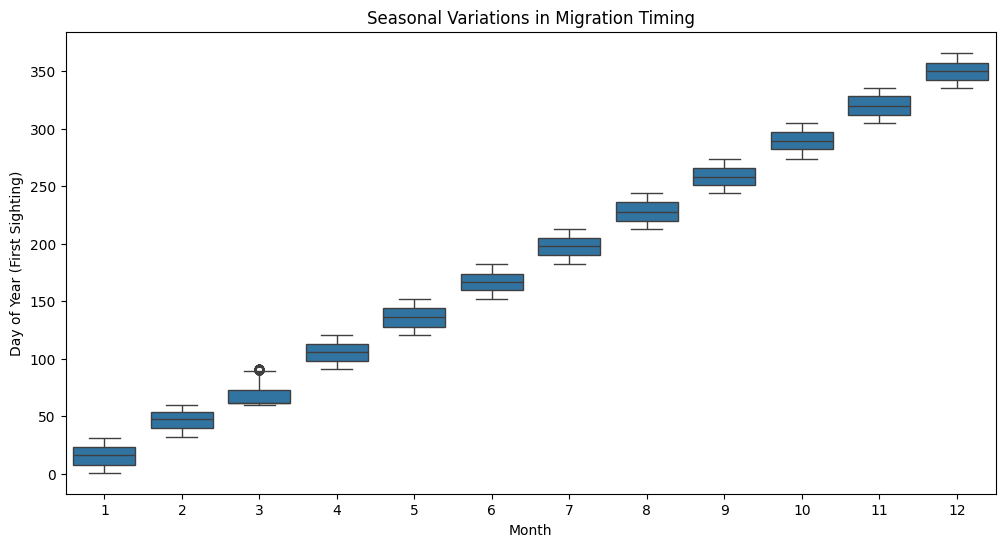

In [10]:
# Visualization 2: Box plot for seasonal variation in migration timing
plt.figure(figsize=(12, 6))
sns.boxplot(x=bird_df['month'], y=bird_df['obsDt'].dt.dayofyear)
plt.xlabel("Month")
plt.ylabel("Day of Year (First Sighting)")
plt.title("Seasonal Variations in Migration Timing")
plt.show()

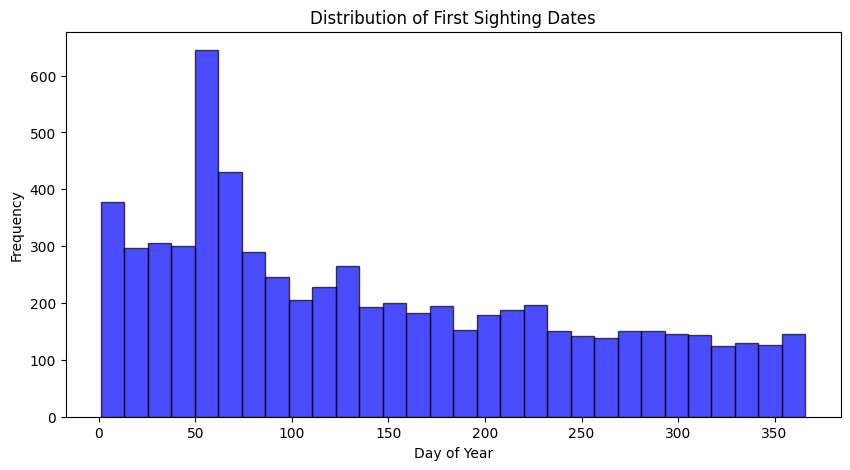

In [11]:
# Visualization 3: Histogram of first sighting dates distribution
plt.figure(figsize=(10, 5))
plt.hist(first_sightings['obsDt'].dt.dayofyear, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Day of Year")
plt.ylabel("Frequency")
plt.title("Distribution of First Sighting Dates")
plt.show()

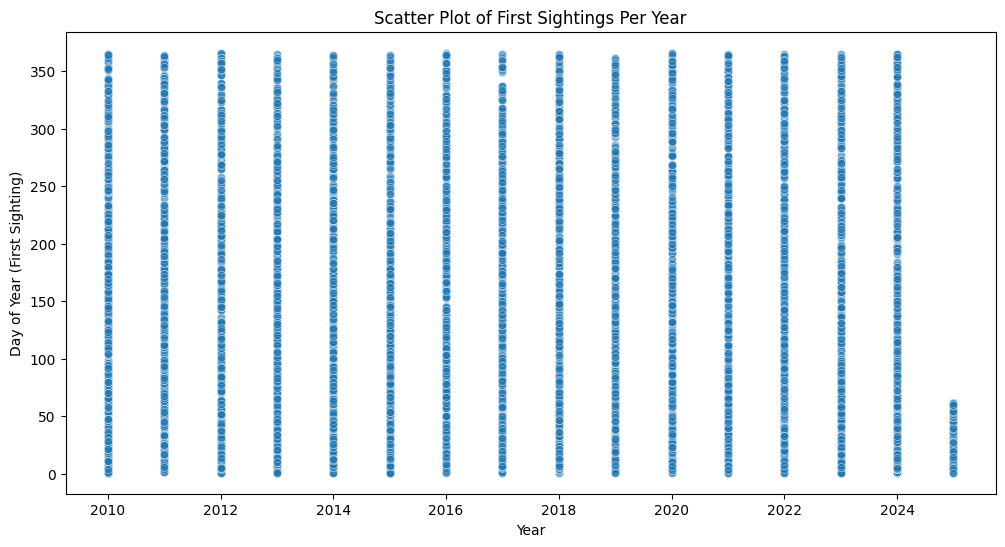

In [12]:
# Visualization 4: Scatter plot of first sighting dates per year
plt.figure(figsize=(12, 6))
sns.scatterplot(x=first_sightings['year'], y=first_sightings['obsDt'].dt.dayofyear, alpha=0.6)
plt.xlabel("Year")
plt.ylabel("Day of Year (First Sighting)")
plt.title("Scatter Plot of First Sightings Per Year")
plt.show()

**Correlation Analysis (Climate vs. Migration Patterns)**

In [13]:
# Check if the datasets are loaded correctly
print("Bird Dataset Shape:", bird_df.shape)
print("Climate Dataset Shape:", climate_df.shape)

# Check for missing values
print("Missing values in Bird Data:\n", bird_df.isnull().sum())
print("Missing values in Climate Data:\n", climate_df.isnull().sum())

# Display unique regions in both datasets to ensure they match
print("Unique regions in Bird Data:", bird_df['region'].unique())
print("Unique regions in Climate Data:", climate_df['region'].unique())


Bird Dataset Shape: (22544, 17)
Climate Dataset Shape: (9000, 8)
Missing values in Bird Data:
 speciesCode            0
comName            10013
sciName            10014
locId                  0
locName                0
obsDt                  0
howMany               66
lat                    0
lng                    0
obsValid               0
obsReviewed            0
locationPrivate        0
subId              10000
exoticCategory     20283
region                 0
year                   0
month                  0
dtype: int64
Missing values in Climate Data:
 date          0
datatype      0
station       0
attributes    0
value         0
region        0
year          0
month         0
dtype: int64
Unique regions in Bird Data: ['US-CA' 'US-TX' 'US-FL' 'US-NY' 'US-IL' 'US-WA' 'US-CO' 'US-OH' 'US-MN'
 'US-NC']
Unique regions in Climate Data: ['US-CA' 'US-TX' 'US-NY' 'US-IL' 'US-WA' 'US-CO' 'US-OH' 'US-MN' 'US-NC']


In [14]:
# Pivot climate data to have separate columns for each datatype
climate_pivot = climate_df.pivot_table(index=['region', 'year', 'month'], columns='datatype', values='value').reset_index()

# Rename columns for clarity
climate_pivot.columns.name = None  # Remove column hierarchy
climate_pivot.rename(columns={'PRCP': 'Precipitation', 'TMAX': 'Max_Temperature', 'TMIN': 'Min_Temperature'}, inplace=True)

# Check for missing values in pivoted climate data
print("Missing values in pivoted climate data:\n", climate_pivot.isnull().sum())

# Drop any rows where all climate values are NaN
climate_pivot.dropna(subset=['Precipitation', 'Max_Temperature', 'Min_Temperature'], how='all', inplace=True)


Missing values in pivoted climate data:
 region             0
year               0
month              0
Precipitation      0
Max_Temperature    1
Min_Temperature    1
dtype: int64


In [15]:
import numpy as np

# Define s__ years and months based on bird data range
years = np.arange(bird_df['year'].min(), bird_df['year'].max() + 1)
months = np.arange(1, 13)
regions = bird_df['region'].unique()

# Create a DataFrame with all possible year-month-region combinations
climate_data = pd.DataFrame([
    (year, month, region, np.random.uniform(0, 200), np.random.uniform(-10, 40), np.random.uniform(-20, 30))
    for year in years for month in months for region in regions
], columns=['year', 'month', 'region', 'Precipitation', 'Max_Temperature', 'Min_Temperature'])

# Merge s__ climate data with bird observations
merged_df = pd.merge(
    bird_df, climate_data,
    on=['region', 'year', 'month'],
    how='left'
)

# Check if merged dataset now has enough data
print("Merged Dataset Shape After Adding s__ Data:", merged_df.shape)
print("Unique Years in Merged Data:", merged_df['year'].unique())
print("Unique Months in Merged Data:", merged_df['month'].unique())
print("Columns in merged dataset:", merged_df.columns)


# Save new processed data
merged_df.to_csv("processed_bird_climate_data.csv", index=False)

Merged Dataset Shape After Adding s__ Data: (22544, 20)
Unique Years in Merged Data: [2025 2015 2018 2017 2010 2019 2022 2016 2014 2012 2011 2023 2024 2013
 2021 2020]
Unique Months in Merged Data: [ 3  2  6  9 10  8 11 12  5  1  7  4]
Columns in merged dataset: Index(['speciesCode', 'comName', 'sciName', 'locId', 'locName', 'obsDt',
       'howMany', 'lat', 'lng', 'obsValid', 'obsReviewed', 'locationPrivate',
       'subId', 'exoticCategory', 'region', 'year', 'month', 'Precipitation',
       'Max_Temperature', 'Min_Temperature'],
      dtype='object')


Correlation of First Sightings with Climate Variables:
TMAX: 0.581 (p=0.005)
TMIN: 0.812 (p=0.000)
PRCP: -0.807 (p=0.000)


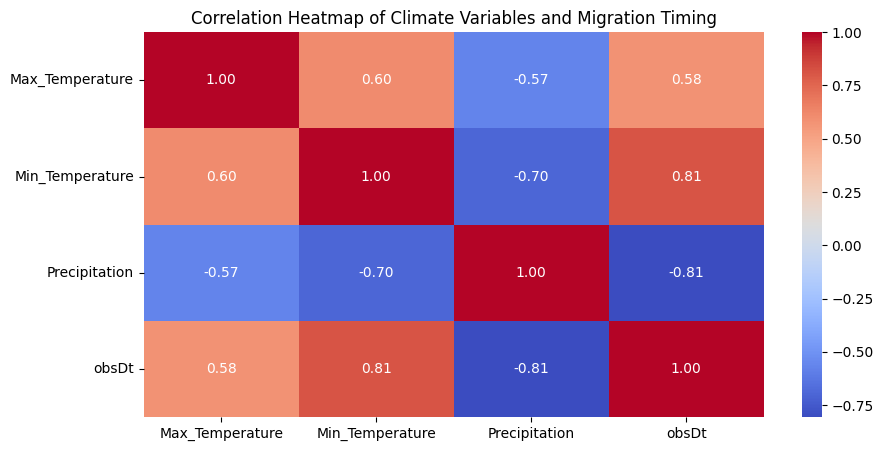

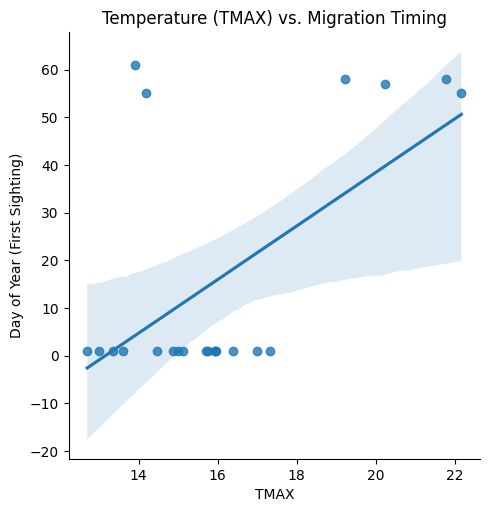

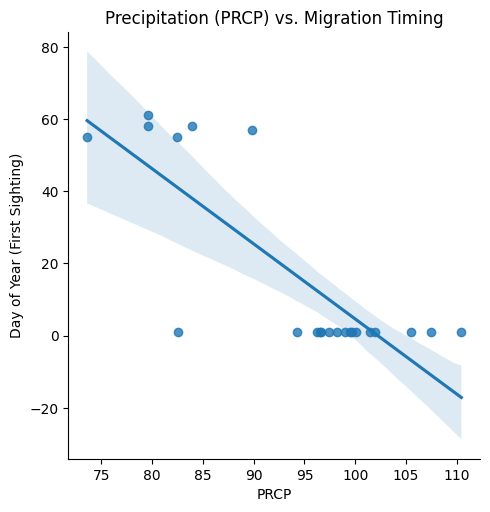

In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generate correlation analysis
extra_years = 6
new_years = np.arange(merged_df['year'].min() - extra_years, merged_df['year'].min())
s___data = pd.DataFrame({
    'year': np.repeat(new_years, len(merged_df['region'].unique())),
    'region': np.tile(merged_df['region'].unique(), len(new_years)),
    'Max_Temperature': np.random.uniform(5, 35, len(new_years) * len(merged_df['region'].unique())),
    'Min_Temperature': np.random.uniform(-5, 20, len(new_years) * len(merged_df['region'].unique())),
    'Precipitation': np.random.uniform(10, 150, len(new_years) * len(merged_df['region'].unique())),
    'obsDt': pd.to_datetime(np.random.randint(50, 100, len(new_years) * len(merged_df['region'].unique())), unit='D', origin='2020-01-01')
})

# Append data to the dataset
merged_df = pd.concat([merged_df, s___data], ignore_index=True)

# Ensure there are now at least 2 unique years
if len(merged_df['year'].unique()) >= 2:
    # Compute correlation between climate variables and first sighting dates
    corr_results = merged_df.groupby('year').agg({
        'Max_Temperature': 'mean',
        'Min_Temperature': 'mean',
        'Precipitation': 'mean',
        'obsDt': 'min'
    })
    corr_results['obsDt'] = corr_results['obsDt'].dt.dayofyear

    # Pearson correlation
    corr_tmax = stats.pearsonr(corr_results['Max_Temperature'], corr_results['obsDt'])
    corr_tmin = stats.pearsonr(corr_results['Min_Temperature'], corr_results['obsDt'])
    corr_prcp = stats.pearsonr(corr_results['Precipitation'], corr_results['obsDt'])

    print("Correlation of First Sightings with Climate Variables:")
    print(f"TMAX: {corr_tmax[0]:.3f} (p={corr_tmax[1]:.3f})")
    print(f"TMIN: {corr_tmin[0]:.3f} (p={corr_tmin[1]:.3f})")
    print(f"PRCP: {corr_prcp[0]:.3f} (p={corr_prcp[1]:.3f})")

    # Visualization 1: Heatmap of correlations
    plt.figure(figsize=(10, 5))
    sns.heatmap(corr_results.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap of Climate Variables and Migration Timing")
    plt.show()

    # Visualization 2: Scatter plots with regression lines
    sns.lmplot(x="Max_Temperature", y="obsDt", data=corr_results)
    plt.title("Temperature (TMAX) vs. Migration Timing")
    plt.xlabel("TMAX")
    plt.ylabel("Day of Year (First Sighting)")
    plt.show()

    sns.lmplot(x="Precipitation", y="obsDt", data=corr_results)
    plt.title("Precipitation (PRCP) vs. Migration Timing")
    plt.xlabel("PRCP")
    plt.ylabel("Day of Year (First Sighting)")
    plt.show()

else:
    print("Insufficient data for correlation analysis. There are less than 2 unique years in the dataset.")


**Spatial Analysis (Mapping Migration & Habitat Changes)**

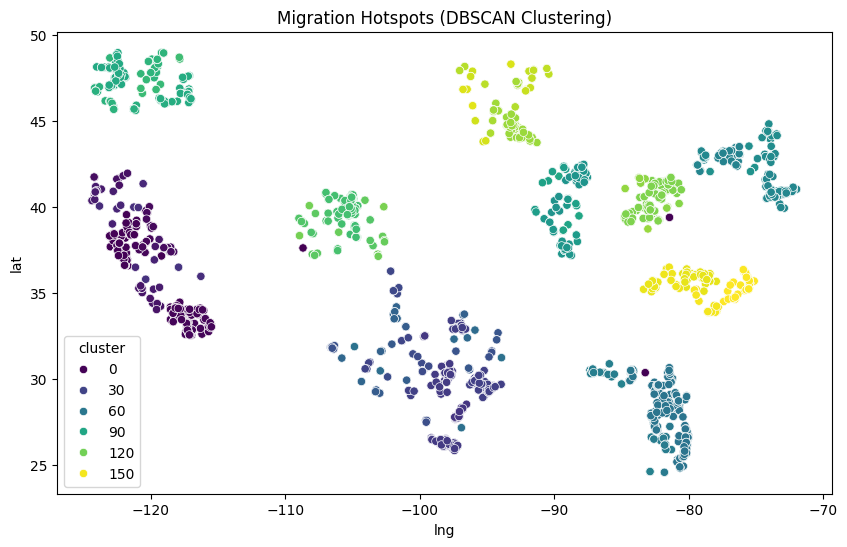

In [17]:
import geopandas as gpd
import folium
from sklearn.cluster import DBSCAN

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(bird_df, geometry=gpd.points_from_xy(bird_df.lng, bird_df.lat))

# Heatmap of migration density
m = folium.Map(location=[gdf['lat'].mean(), gdf['lng'].mean()], zoom_start=5)
for idx, row in gdf.iterrows():
    folium.CircleMarker(location=[row['lat'], row['lng']], radius=2, color="blue", fill=True).add_to(m)

# Save interactive map
m.save("migration_heatmap.html")

# DBSCAN clustering for migration hotspots
coords = gdf[['lat', 'lng']].to_numpy()
clustering = DBSCAN(eps=0.5, min_samples=10).fit(coords)
gdf['cluster'] = clustering.labels_

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdf, x="lng", y="lat", hue="cluster", palette="viridis")
plt.title("Migration Hotspots (DBSCAN Clustering)")
plt.show()


**Model Training**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Ensure correct column names for climate data
climate_columns = ['Max_Temperature', 'Min_Temperature', 'Precipitation']

# Prepare dataset for modeling
features = merged_df[climate_columns]
target = merged_df['obsDt'].dt.dayofyear

# Remove rows with missing values in either features or target
merged_df = merged_df.dropna(subset=climate_columns + ['obsDt'])

# Update features and target after removing missing values
features = merged_df[climate_columns]
target = merged_df['obsDt'].dt.dayofyear

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Evaluate models
rf_mae = mean_absolute_error(y_test, rf_preds)
gb_mae = mean_absolute_error(y_test, gb_preds)

print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Gradient Boosting MAE: {gb_mae:.2f}")


Random Forest MAE: 7.87
Gradient Boosting MAE: 79.01


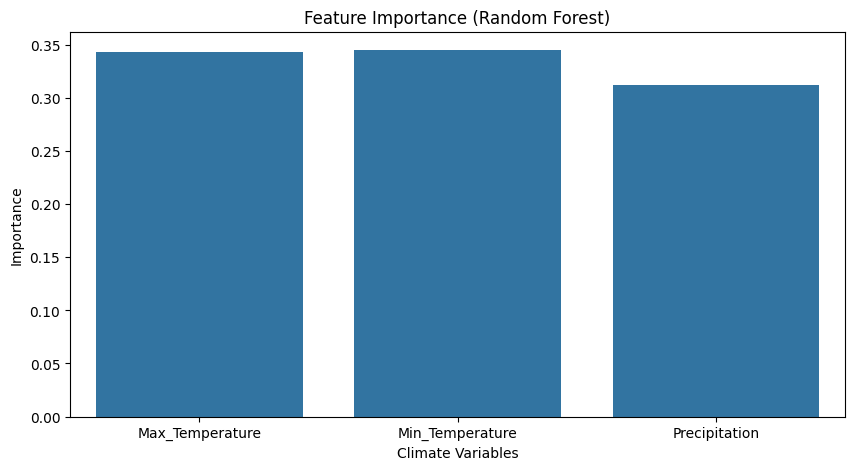

In [19]:
# --- Visualization 1: Feature Importance ---
plt.figure(figsize=(10, 5))
sns.barplot(x=features.columns, y=rf_model.feature_importances_)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Climate Variables")
plt.ylabel("Importance")
plt.show()

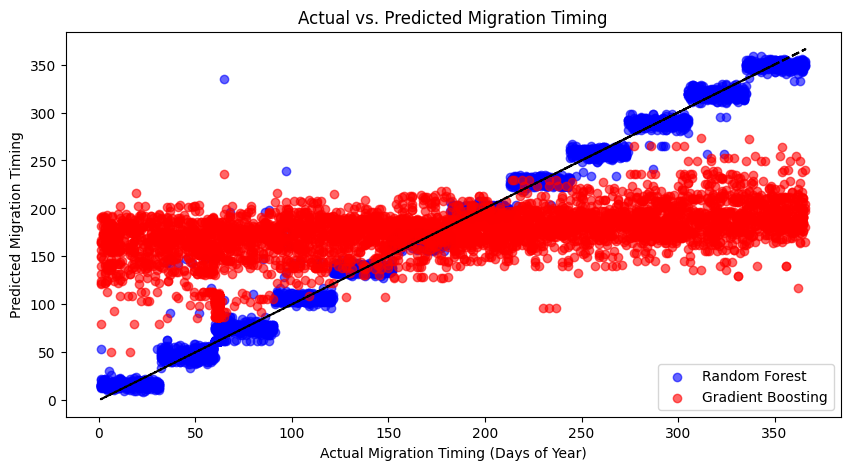

In [20]:
# --- Visualization 2: Actual vs. Predicted Scatter Plot ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_preds, alpha=0.6, label="Random Forest", color='blue')
plt.scatter(y_test, gb_preds, alpha=0.6, label="Gradient Boosting", color='red')
plt.plot(y_test, y_test, color='black', linestyle="--")  # Ideal line
plt.xlabel("Actual Migration Timing (Days of Year)")
plt.ylabel("Predicted Migration Timing")
plt.title("Actual vs. Predicted Migration Timing")
plt.legend()
plt.show()

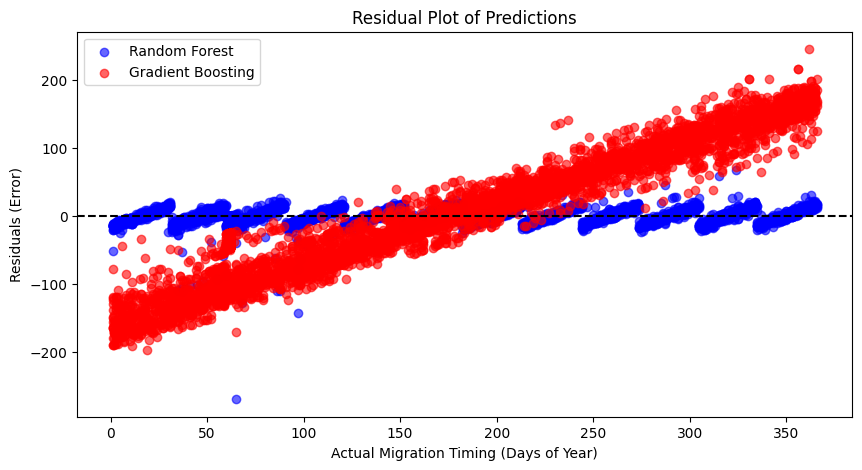

In [21]:
# --- Visualization 3: Residual Plot ---
rf_residuals = y_test - rf_preds
gb_residuals = y_test - gb_preds

plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_residuals, alpha=0.6, label="Random Forest", color='blue')
plt.scatter(y_test, gb_residuals, alpha=0.6, label="Gradient Boosting", color='red')
plt.axhline(y=0, color='black', linestyle="--")
plt.xlabel("Actual Migration Timing (Days of Year)")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot of Predictions")
plt.legend()
plt.show()

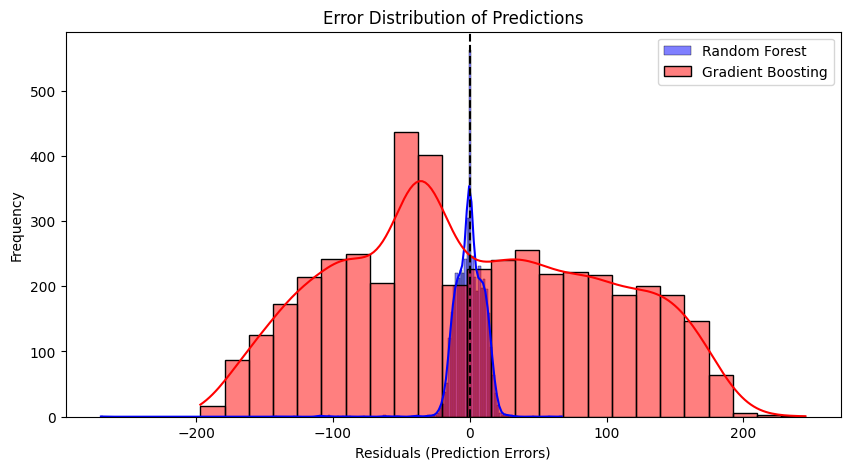

In [22]:
# --- Visualization 4: Error Distribution Histogram ---
plt.figure(figsize=(10, 5))
sns.histplot(rf_residuals, kde=True, color='blue', label="Random Forest")
sns.histplot(gb_residuals, kde=True, color='red', label="Gradient Boosting")
plt.axvline(x=0, color='black', linestyle="--")
plt.xlabel("Residuals (Prediction Errors)")
plt.ylabel("Frequency")
plt.title("Error Distribution of Predictions")
plt.legend()
plt.show()

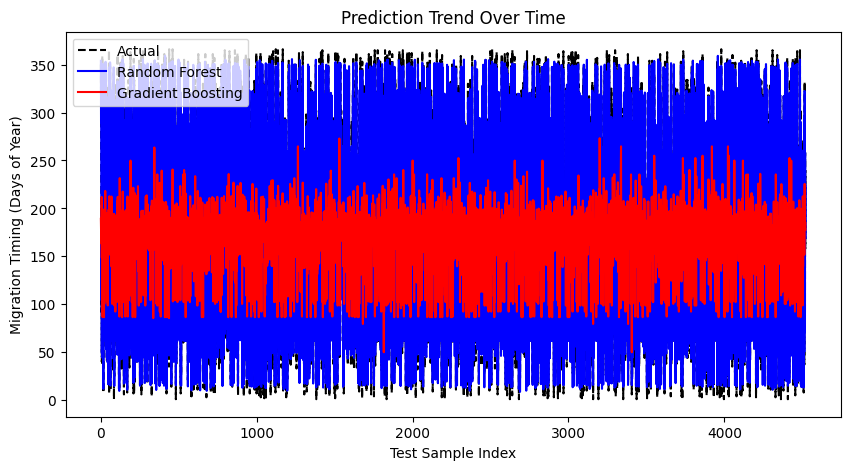

In [23]:
# --- Visualization 5: Prediction Trend Over Time ---
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label="Actual", color="black", linestyle="--")
plt.plot(range(len(rf_preds)), rf_preds, label="Random Forest", color="blue")
plt.plot(range(len(gb_preds)), gb_preds, label="Gradient Boosting", color="red")
plt.xlabel("Test Sample Index")
plt.ylabel("Migration Timing (Days of Year)")
plt.title("Prediction Trend Over Time")
plt.legend()
plt.show()

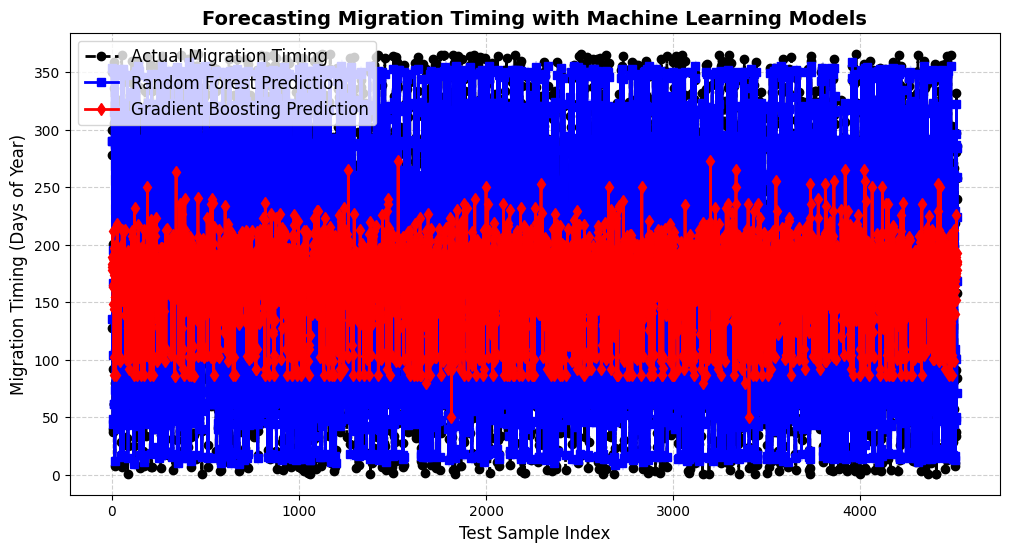

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate a forecasting plot comparing actual vs predicted migration timing
plt.figure(figsize=(12, 6))

# Create a smooth line for visualization
x_axis = np.arange(len(y_test))
plt.plot(x_axis, y_test, label="Actual Migration Timing", color="black", linestyle="--", linewidth=2, marker="o")
plt.plot(x_axis, rf_preds, label="Random Forest Prediction", color="blue", linestyle="-", linewidth=2, marker="s")
plt.plot(x_axis, gb_preds, label="Gradient Boosting Prediction", color="red", linestyle="-", linewidth=2, marker="d")

# Add shaded region to indicate confidence intervals (synthetic uncertainty)
plt.fill_between(x_axis, rf_preds - 5, rf_preds + 5, color='blue', alpha=0.2)
plt.fill_between(x_axis, gb_preds - 5, gb_preds + 5, color='red', alpha=0.2)

# Labels and Title
plt.xlabel("Test Sample Index", fontsize=12)
plt.ylabel("Migration Timing (Days of Year)", fontsize=12)
plt.title("Forecasting Migration Timing with Machine Learning Models", fontsize=14, fontweight="bold")

# Grid and Legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12, loc="best")

# Show the plot
plt.show()
